In [1]:
#import libaries
import numpy as np
import skimage 
from skimage import io
from skimage import color
from matplotlib import pyplot as plt

In [2]:
# load image
verlauf = io.imread(r'C:\Users\Jerome\Desktop\Code\Einführung\20x20.png')

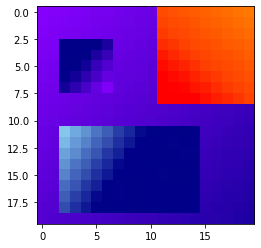

In [3]:
# show image
plt.imshow(verlauf)

In [4]:
# grayscale
gray = color.rgb2gray(verlauf)

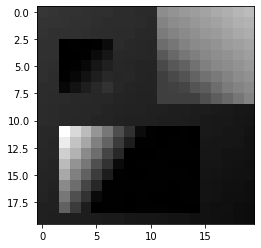

In [5]:
# show grayscale
plt.imshow(gray, cmap = 'gray')

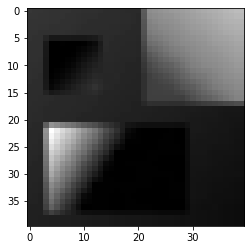

In [6]:
def bilineare_interpolation(img,scale):
    #assert isinstance(img[0,0], int), 'type is {}, should be int'.format(type(img[0,0]))
    # unzip image (width,height)
    origin_width, origin_height = img.shape
    # scale image (= img)
    target_width =int(origin_width * scale)
    target_height =int(origin_height * scale)
    # pad img
    img_padded = np.pad(img, 1, mode = 'edge')
    #create new image (=target_img) with zeros as values
    target_img= np.zeros((target_width,target_height))
    
    # loop over all pixel of t_img
    for x in range(target_width):
        for y in range(target_height):
            #select origin pixel
            x_origin = x/scale + 1
            y_origin = y/scale + 1
            # to avoid half pixel, we round them
            # than we round up for the maximun value of the x and y pixel and we round down for the minimum of the x and y pixel
            # we use this method to get two pixel on each axis near the pixel we want to determine
            x_min = int(np.floor(x_origin)) 
            x_max = int(np.ceil(x_origin)) 
            y_min = int(np.floor(y_origin)) 
            y_max = int(np.ceil(y_origin))
            # Find the point between Q_11 and Q_21, called R₁, and the point between Q_12 and Q_22, called R₂
            # in this case there is a 1:1 correspondence, which can be taken
            if (x_max-x_min) == 0 and (y_max-y_min == 0):
                 f_x_y = img_padded[int(x_origin), int(y_origin)]
            # in this case x is equal for Q₁₁ and Q₂₁ and hence Q₁₁ == Q₂₁,
            # the same happens for Q_12 and Q_22
            # interpolation needs only to be done in x direction
            elif (x_max-x_min) == 0:
                f_x_y1 = img_padded[int(x_origin), y_min]
                f_x_y2 = img_padded[int(x_origin), y_max]
                f_x_y = (((y_max-y_origin)/(y_max-y_min)) * f_x_y1) + (((y_origin-y_min)/(y_max-y_min)) * f_x_y2)
            # in this case y is equal and interpolation needs only to be done in x direction
            elif (y_max-y_min) == 0:
                f_x1_y = img_padded[x_min, int(y_origin)]
                f_x2_y = img_padded[x_max, int(y_origin)]
                f_x_y = (((x_max-x_origin)/(x_max-x_min)) * f_x1_y) + (((x_origin-x_min)/(x_max-x_min)) * f_x2_y)
            else:
                # find the points Q_11, Q_12, Q_21 and Q_22
                Q_11 = img_padded[x_min, y_min]
                Q_12 = img_padded[x_min, y_max]
                Q_21 = img_padded[x_max, y_min]
                Q_22 = img_padded[x_max, y_max]

                # find the points R₁ and R₂
                r1 = ((x_max - x_origin)/(x_max - x_min)) * Q_11 + ((x_origin - x_min)/(x_max - x_min)) * Q_21
                r2 = ((x_max - x_origin)/(x_max - x_min)) * Q_12 + ((x_origin - x_min)/(x_max - x_min)) * Q_22
                
                # use bilinear interpolation
                f_x_y = ((y_max - y_origin)/(y_max - y_min)) * r1 + ((y_origin - y_min)/(y_max - y_min)) * r2    
            
            # set t_img as interpolated image
            target_img[x,y] = f_x_y
            
    #return new imgage       
    return target_img
            
# use function    
upscaled_img= bilineare_interpolation(gray, 2)
plt.imshow(upscaled_img, cmap = 'gray')

numpy.float64

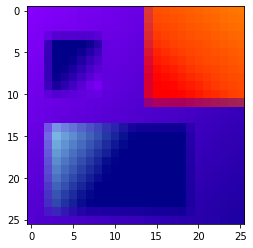

In [7]:
def bilineare_interpolation_rgb(img,scale):
    #the image must be an numpy integer
    if img.dtype != 'uint8':
        img = img.astype('uint8')
    assert isinstance(img[0,0,0], np.uint8), 'type is {}, should be numpy.uint8, that means aa numpy integer'.format(type(img[0,0,0]))
     # unzip image (width,height, rgb-channels)
    origin_width, origin_height, channels = img.shape
    # scale image (= img)
    target_width =int(origin_width * scale)
    target_height =int(origin_height * scale)
    
    #create new image (=target_img) with zeros as values
    target_img = np.zeros((target_width, target_height, channels))
    
    #split the img into all color channels and use the function "bilibilineare_interpolation" for each channel
    #transform the floats into integers, because the function only works with intergers by dividing by 255.0
    target_img[:,:, 0] = bilineare_interpolation((img[:, :, 0] / 255.0), scale)
    target_img[:,:, 1] = bilineare_interpolation((img[:, :, 1] / 255.0), scale)
    target_img[:,:, 2] = bilineare_interpolation((img[:, :, 2] / 255.0), scale)
    
    #return new imgage
    return target_img

# use function    
upscaled_img= bilineare_interpolation_rgb(verlauf, 1.3)
plt.imshow(upscaled_img)
type(np.max(upscaled_img))

numpy.uint8

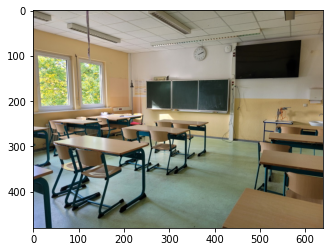

In [8]:
#use upscaling on examples
klassenzimmer = io.imread(r'C:\Users\Jerome\Desktop\Code\Einführung\Klassenzimmer OG (klein).jpg')
plt.imshow(klassenzimmer)
type(klassenzimmer[0,0,1])

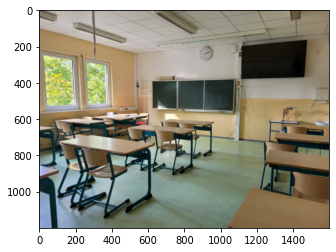

In [9]:
upscaled_klassenzimmer_bi= bilineare_interpolation_rgb(klassenzimmer, 2.5)
plt.imshow(upscaled_klassenzimmer_bi)

numpy.uint8

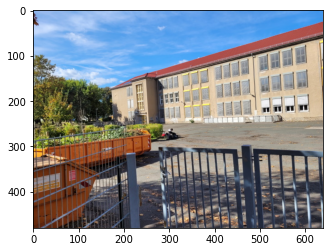

In [10]:
schulhaus = io.imread(r'C:\Users\Jerome\Desktop\Code\Einführung\Schulhaus OG (klein).jpg')
plt.imshow(schulhaus)
type(schulhaus[0,0,1])

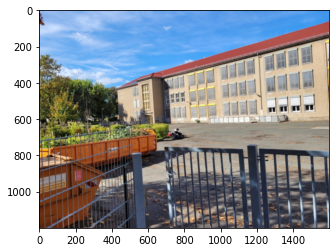

In [11]:
upscaled_schulhaus_bi= bilineare_interpolation_rgb(schulhaus, 2.5)
plt.imshow(upscaled_schulhaus_bi)

numpy.uint8

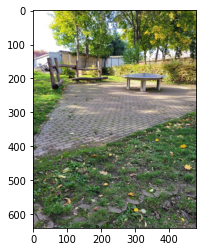

In [12]:
tt_platte = io.imread(r'C:\Users\Jerome\Desktop\Code\Einführung\Tischtennisplatte OG (klein).jpg')
plt.imshow(tt_platte)
type(tt_platte[0,0,1])

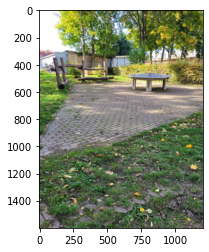

In [13]:
upscaled_tt_platte_bi= bilineare_interpolation_rgb(tt_platte, 2.5)
plt.imshow(upscaled_tt_platte_bi)

In [14]:
io.imsave('Klassenzimmer_bi3.png',upscaled_klassenzimmer_bi)
io.imsave('Schulhaus_bi3.png',upscaled_schulhaus_bi)
io.imsave('Tischtennisplatte_bi3.png',upscaled_tt_platte_bi)
#vernachlässigbare Error Nachricht

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
